<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_2/assignment_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2.1
Zachariah Freitas



## Import Libraries

In [289]:
# Import Libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd 

# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.gridspec as gs
import seaborn as sns; sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Question 2

### Problem 2.1

**ETL and EDA**

In [290]:
# Get data
s_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/shelter_data.csv')

s_df.head(3).T

,0,1,2
AnimalID,A671945,A656520,A686464
Name,Hambone,Emily,Pearce
DateTime,2014-02-12 18:22:00,2013-10-13 12:44:00,2015-01-31 12:28:00
OutcomeType,Return_to_owner,Euthanasia,Adoption
OutcomeSubtype,NaN,Suffering,Foster
AnimalType,Dog,Cat,Dog
SexuponOutcome,Neutered Male,Spayed Female,Neutered Male
AgeuponOutcome,1 year,1 year,2 years
Breed,Shetland Sheepdog Mix,Domestic Shorthair Mix,Pit Bull Mix
Color,Brown/White,Cream Tabby,Blue/White


In [291]:
s_df.describe().T

,count,unique,top,freq
AnimalID,26729,26729,A671945,1
Name,19038,6374,Max,136
DateTime,26729,22918,2015-08-11 00:00:00,19
OutcomeType,26729,5,Adoption,10769
OutcomeSubtype,13117,16,Partner,7816
AnimalType,26729,2,Dog,15595
SexuponOutcome,26728,5,Neutered Male,9779
AgeuponOutcome,26711,44,1 year,3969
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824


In [292]:
s_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

**Data Engineering**

In [293]:
# this line drops any rows with missing data
cleaned_data = s_df.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)

# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [294]:
X_train.head(3).T

,1714,6851,6731
AnimalType,1.0,0.0,1.0
SexuponOutcome,1.0,2.0,2.0
AgeuponOutcome,18.0,16.0,27.0


**Model and Review Performance**

In [295]:
#Apply the model here and get accuracy score.
short_tree = DecisionTreeClassifier(max_depth=3) #Create your model here
short_tree = short_tree.fit(X_train, y_train)   #Fit on training data
y_pred = short_tree.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.66 


Accuracy on training data: 0.67 
Accuracy on test data:     0.66 


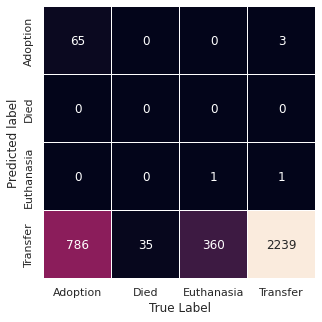

In [296]:
# Here is a better approach for future loops.
def classify(X,y, max_depth, plotit=True, test_size=0.5, random_state=42, cmap=None, ax = None):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=test_size)
    clf= DecisionTreeClassifier(max_depth=max_depth)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    labels = clf.classes_ 
    mat = confusion_matrix(y_test, y_pred, labels=labels)
    cm_array_df = pd.DataFrame(mat, 
                               index=le.inverse_transform(labels), 
                               columns=le.inverse_transform(labels))
  
    if plotit:
        print('Accuracy on training data: %0.2f ' %(training_accuracy))
        print('Accuracy on test data:     %0.2f ' % (test_accuracy))
        plt.figure(1, figsize=[5,5])
        ax = sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap=cmap, ax=ax)
        ax.set(ylabel="Predicted label", xlabel="True Label")
        plt.show(ax)
    return max_depth, training_accuracy, test_accuracy, cm_array_df

short_tree_test = classify(X,y, max_depth = 3, plotit=True, test_size=0.5, random_state=42)


In [300]:
# Classification Performance Metrics
from sklearn import metrics
target_names = le.inverse_transform(short_tree.classes_) # This is necessary due to the data transformation above.
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Adoption       0.96      0.08      0.14       851
        Died       0.00      0.00      0.00        35
  Euthanasia       0.50      0.00      0.01       361
    Transfer       0.65      1.00      0.79      2243

    accuracy                           0.66      3490
   macro avg       0.53      0.27      0.23      3490
weighted avg       0.71      0.66      0.54      3490



In [301]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels= le.inverse_transform(short_tree.classes_)
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results.T)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,3
Died,0,0,0,0
Euthanasia,0,0,1,1
Transfer,786,35,360,2239


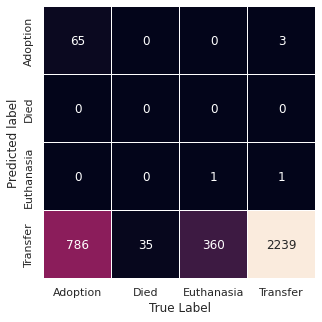

In [302]:
# Visualize the confusion matirx.
def visualize_confusion_matirx(model, y_test, y_pred, ax=None, cmap=None):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns; sns.set()
  labels = model.classes_  # Get the unique labels in the model.
  mat = confusion_matrix(y_test, y_pred, labels=labels)
  cm_array_df = pd.DataFrame(mat, 
                             index=le.inverse_transform(labels), 
                             columns=le.inverse_transform(labels))
  plt.figure(1, figsize=[5,5])
  ax = sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap=cmap, ax=ax)
  ax.set(ylabel="Predicted label", xlabel="True Label")
  plt.show(ax);


visualize_confusion_matirx(short_tree, y_test, y_pred)

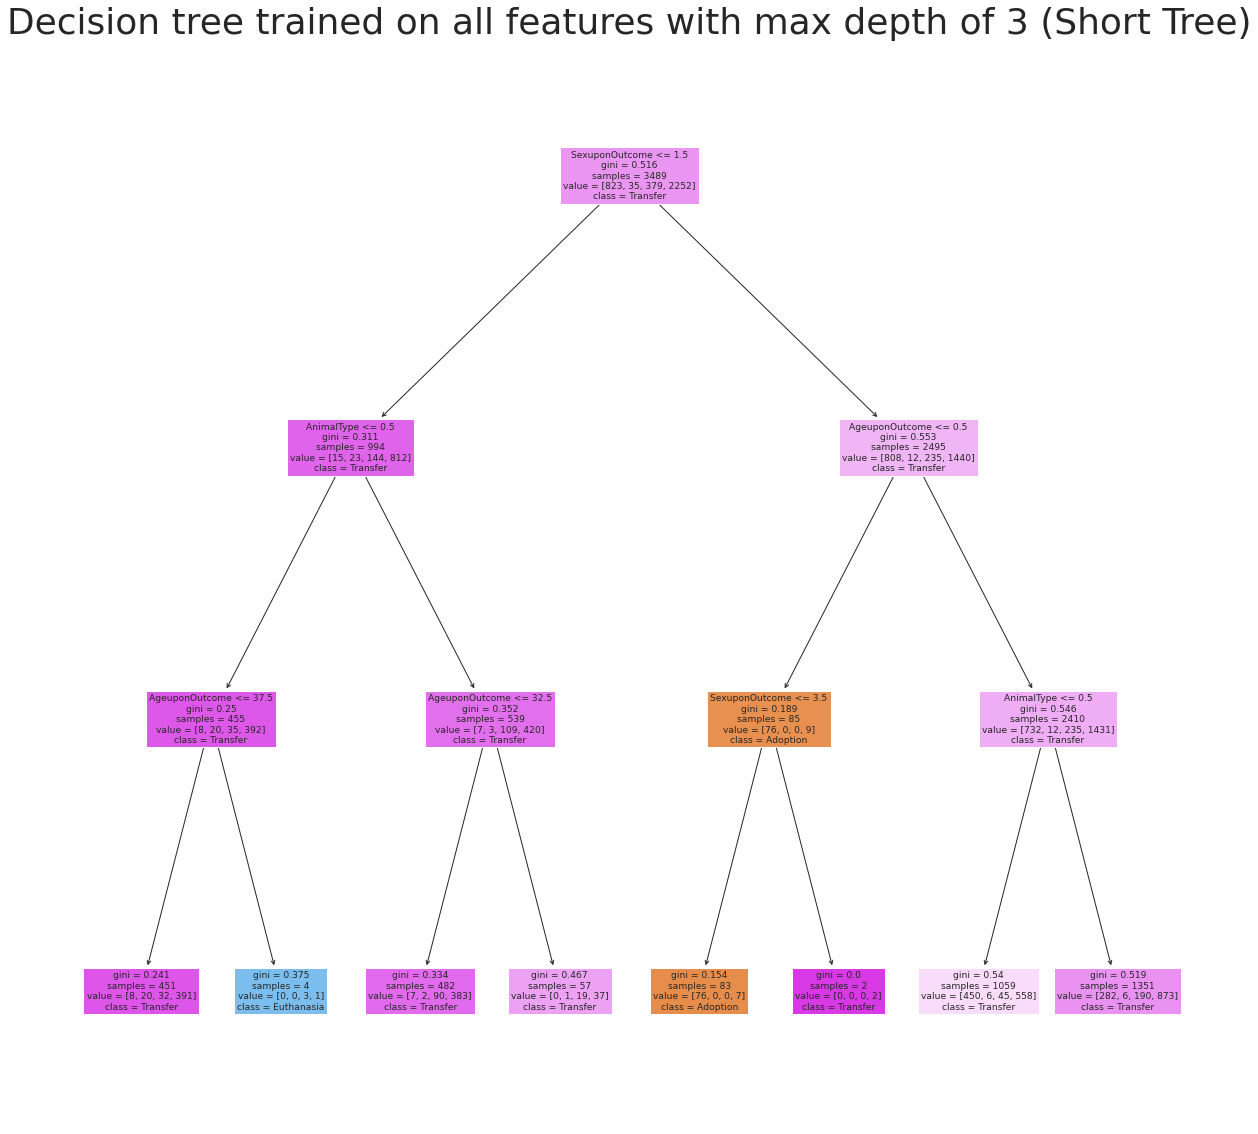

In [303]:
# Plot the decision tree
def visualize_tree(model, class_names=None, title = None, fontsize = 36, w=20,h=20):
  if class_names is None:
    class_names = list(map(str, model.classes_));
  fig,ax = plt.subplots(figsize = (w,h))
  from sklearn import tree
  treeplot = tree.plot_tree(short_tree, 
                            filled=True, 
                            max_depth=None,
                            feature_names= model.feature_names_in_, 
                            class_names = class_names,
                            ax=ax)
  if title is None:
    plt.show()
  else:
    plt.title(title, fontdict={'fontsize': fontsize})
    plt.show()


visualize_tree(short_tree, 
               le.inverse_transform(short_tree.classes_),
               "Decision tree trained on all features with max depth of 3 (Short Tree)")

**Vary the max_depth Hyperparameter** <br>
Vary the decision tree depth in a loop, increasing depth from 3 to 10. Make a plot of training and test set error as the decision tree depth is varied.

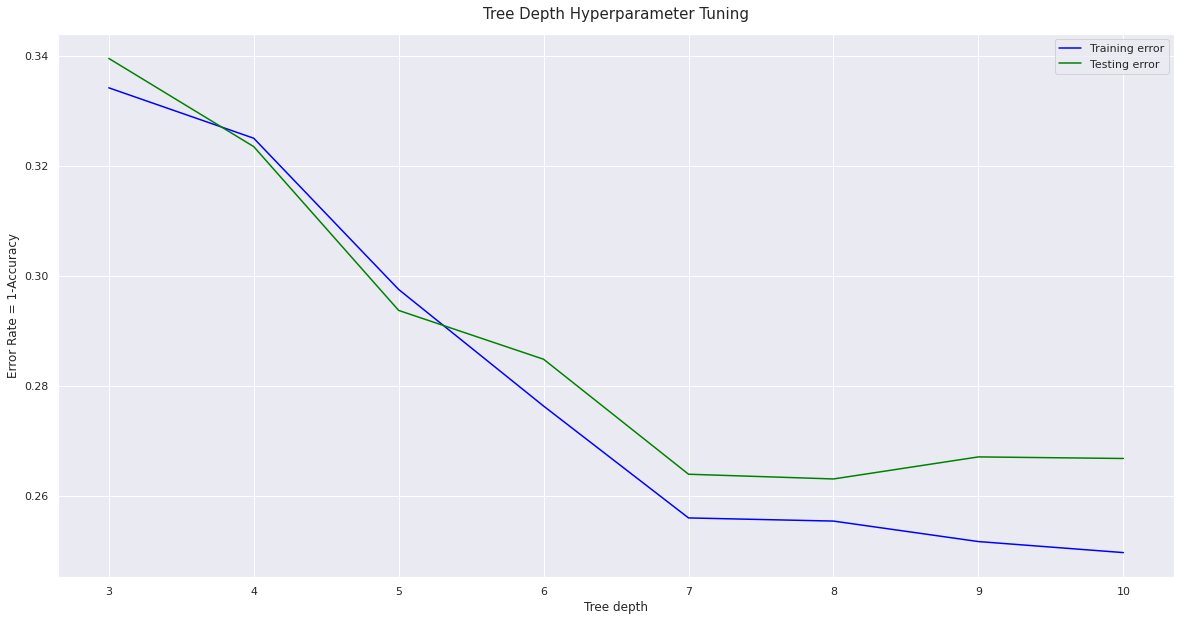

In [304]:
# Create function to capture error rate
def get_accuracy(x_train, y_train, x, y, bott_r = 1, top_r = 1, error = False):
  from sklearn.metrics import accuracy_score
  max_depths = range(bott_r, top_r + 1)
  error_results = []
  for max_depth in max_depths:
      model = DecisionTreeClassifier(max_depth=max_depth)
      model = model.fit(x_train, y_train)
      if error==True:
        error_results.append(1-accuracy_score(y, model.predict(x))) # Save Error Rate = 1-Accuracy
      else:
        error_results.append(accuracy_score(y, model.predict(x))) # Save Accuracy
  return error_results

# Create function for plotting error or accuracy between test and control. 
def plot_accuracy(x_train, y_train, x_test, y_test, bott_r = 1, top_r = 1, error = False):
  # Get data for plot
  training_error = get_accuracy(x_train, y_train, x_train, y_train, bott_r, top_r, error=error)
  testing_error = get_accuracy(x_train, y_train, x_test, y_test, bott_r, top_r, error=error)
  # Make a plot of training and test set error as the decision tree depth is varied.
  max_depths = range(bott_r, top_r + 1)
  plt.figure(figsize=[20,10])
  plt.plot(max_depths, training_error, color='blue', label='Training error')
  plt.plot(max_depths, testing_error, color='green', label='Testing error')
  plt.xlabel('Tree depth')
  # plt.axvline(x=5, color='orange', linestyle='--')
  if error==True:
    plt.ylabel('Error Rate = 1-Accuracy')
  else:
    plt.ylabel('Accuracy Rate')
  plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
  plt.legend()
  plt.show()


# Execute Error Plot
plot_accuracy(X_train, y_train, X_test, y_test, 3, 10, error = True)


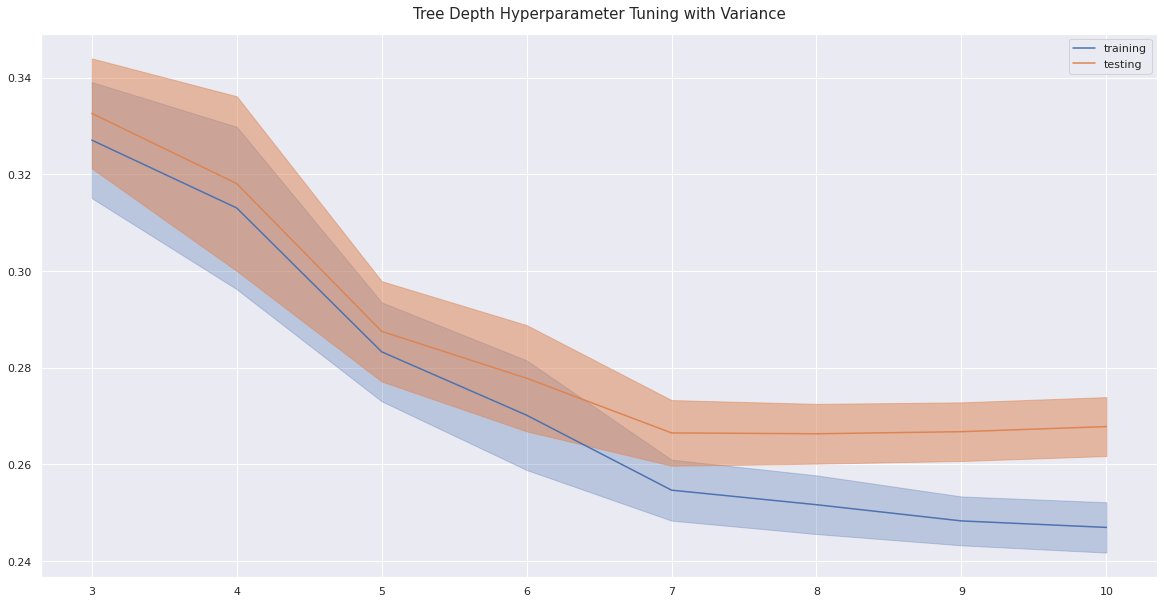

In [305]:
# Here is the same approach but with random noise to get a ditribution or results.

fits={}
for max_depth in np.arange(3,10+1,1):
    fits[max_depth]=[]
    for i in range(200):
        fits[max_depth].append(classify(X,y,max_depth, False))
nbrs=np.arange(3,10+1,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

# Colors
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

plt.figure(figsize=[20,10])
plt.gca()#.invert_xaxis()
plt.title('Tree Depth Hyperparameter Tuning with Variance', pad=15, size=15)
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)
plt.legend();

**Findings - Tree depth Hyperparameter Tuning**<br>
The picture above is a plot of training and test set error as the decision tree depth is varied from 3 to 10. You can clearly see that as our training error rate improves with each increase in depth, our test error rate slowly begins to deteriorate in performance after a maxdepth of 7 or 8. This is an excellent demonstration of the variance bias tradeoff.

**Pruning Parameter** <br>
Use pruning to control the complexity of the decision tree. Pruning uses a complexity parameter to control tree size and remove unnecessary nodes. Some documentation for how scikit-learn implements pruning is [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py).

In [306]:
# Generate Model
cp_tree = DecisionTreeClassifier(random_state=0)
path = cp_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

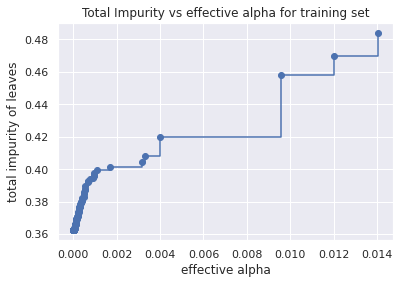

In [307]:
# Plot alphas and impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [308]:
# Next, we train a decision tree using the effective alphas. 
trees = []
for ccp_alpha in ccp_alphas:
    cp_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    cp_tree.fit(X_train, y_train)
    trees.append(cp_tree)


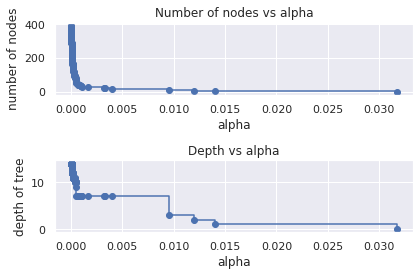

In [309]:
# Now let's plot alphas and thier relationships to nodes and tree depth.
node_counts = [cp_tree.tree_.node_count for cp_tree in trees]
depth = [cp_tree.tree_.max_depth for cp_tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

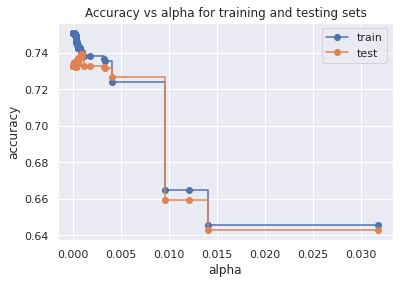

In [310]:
# Now let's plot alpha values and thier relationship to accuracy between and test and training datasets.
train_scores = [cp_tree.score(X_train, y_train) for cp_tree in trees]
test_scores = [cp_tree.score(X_test, y_test) for cp_tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to close to a 100% (~86%) training accuracy and ~61% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.00012 maximizes the testing accuracy.

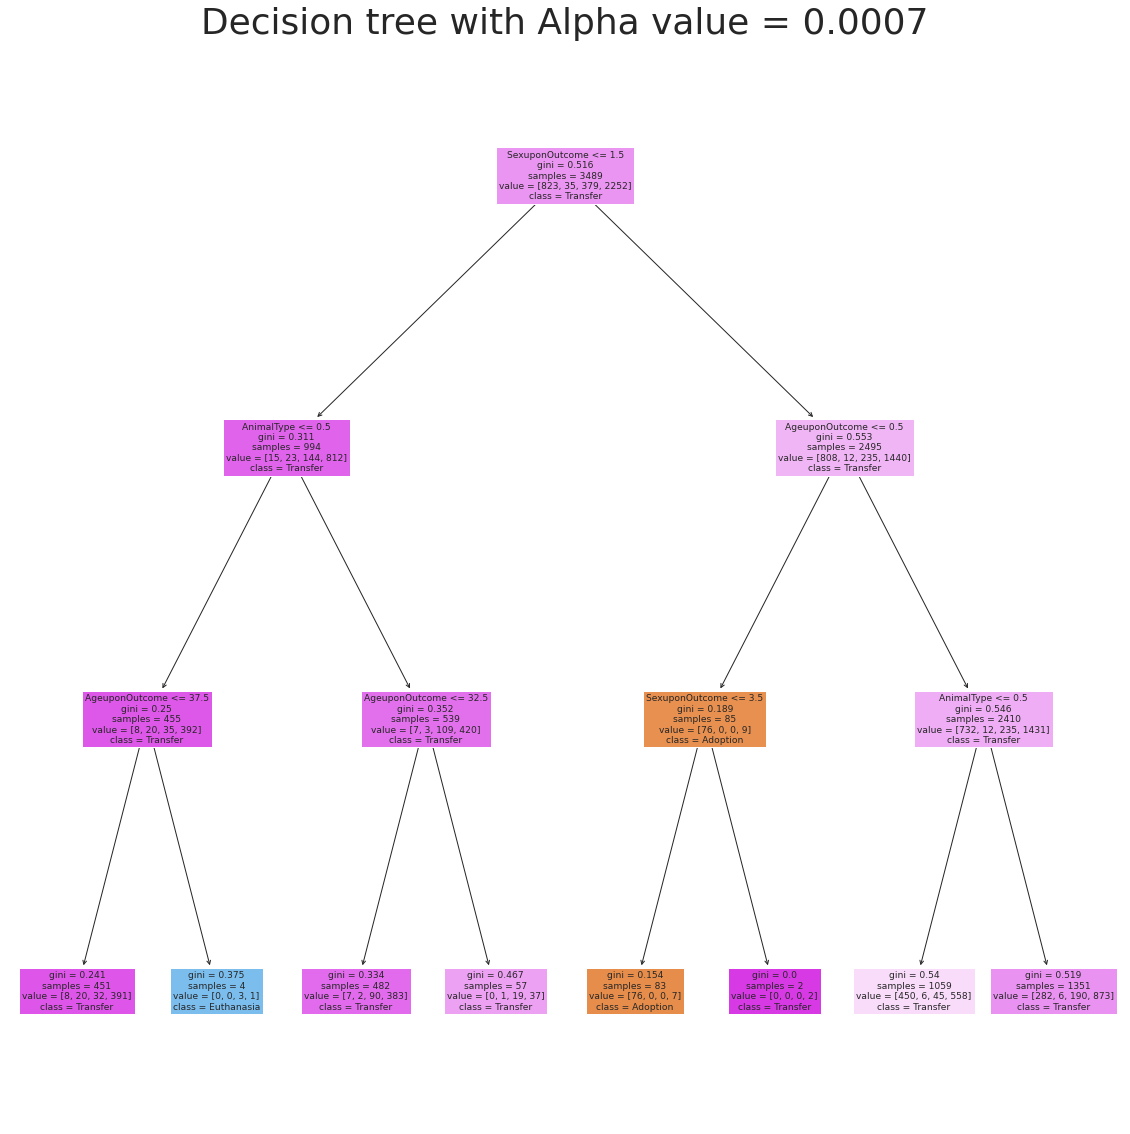

In [311]:
# Plot a pruned decision tree with ccp_apha value of 0.0007
ccp_alpha = 0.0007
alpha_treeplot = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_train, y_train)

# Visualize the tree. 
visualize_tree(alpha_treeplot, 
               le.inverse_transform(alpha_treeplot.classes_), 
               "Decision tree with Alpha value = 0.0007")

**Short Tree vs. Pruned Tree**

Original Short Tree
Accuracy Score: 0.66 



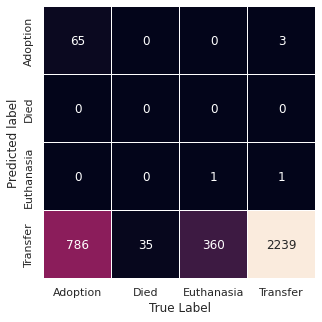

In [312]:
# Plot Before - Short Tree
print('Original Short Tree')
print('Accuracy Score:', round(accuracy_score(y_test, short_tree.predict(X_test)),3),'\n')
visualize_confusion_matirx(short_tree, y_test, short_tree.predict(X_test))

Pruned Tree - Alpha = 0.0007
Accuracy Score: 0.737 



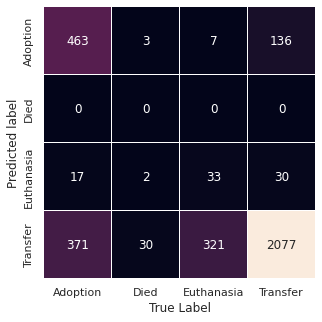

In [313]:
# Plot After - Alpha = 0.0007
print('Pruned Tree - Alpha = 0.0007')
print('Accuracy Score:', round(accuracy_score(y_test, alpha_treeplot.predict(X_test)),3),'\n')
visualize_confusion_matirx(alpha_treeplot, y_test, alpha_treeplot.predict(X_test))


**Findings**<br>
The short tree has an accuracy score of 0.66 while the pruned tree had an accuracy score of 0.73. This improvemnt was mainly concentrated in our ability to predict adoptions and euthanasia with a slight drop in our predictions for Transfers.

### Problem 2.2


Download the file text_data.csv file (located in your assignment prompt in Blackboard).
Each feature in this dataset is how often a word appears in the original text.

In [314]:
# Get data
t_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/text_data.csv')

# Resaving as a generic name for reusable code.
df = t_df

t_df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
meta_author,hamilton,jay,jay
meta_title,general introduction for the independent journ...,concerning dangers from foreign force and infl...,the same subject continued concerning dangers ...
000,0,0,0
10,0,0,0
...,...,...,...
yourselves,0,0,0
zaleucus,0,0,0
zeal,3,0,0
zealand,0,0,0


In [315]:
t_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,85.0,42.000000,24.681302,0.0,21.0,42.0,63.0,84.0
000,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
10,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
11,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
13,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
yourselves,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zaleucus,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zeal,85.0,0.305882,0.617667,0.0,0.0,0.0,0.0,3.0
zealand,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0


 In this section, you will again train and test a decision tree, this time using text
data. The starting template Jupyter notebook will get you started with this data.


In [329]:
# Create the decision tree here Randomstate=42 90% training and 10% testing
X = t_df.drop(['Unnamed: 0','meta_author','meta_title'], axis=1)
le = preprocessing.LabelEncoder()
labels = t_df['meta_author']
le.fit(labels)
y=le.transform(labels)

# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [330]:
#Apply the model here
clf = DecisionTreeClassifier() #Create your model here
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.67 


Then you will write code (you can re-use a lot from the previous question) to vary
the depth of the tree you train on the text dataset. To get the plot of accuracy, you can re-use your code from 2.1. Make sure to set the test size to 0.10. Plot the
accuracy (train and test) as you vary the depth of the tree from 1 to 15.


In [318]:
#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 15 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(accuracy_score(y_train, model_1.predict(X_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(accuracy_score(y_test, model_2.predict(X_test))) # Save Error Rate = 1-Accuracy


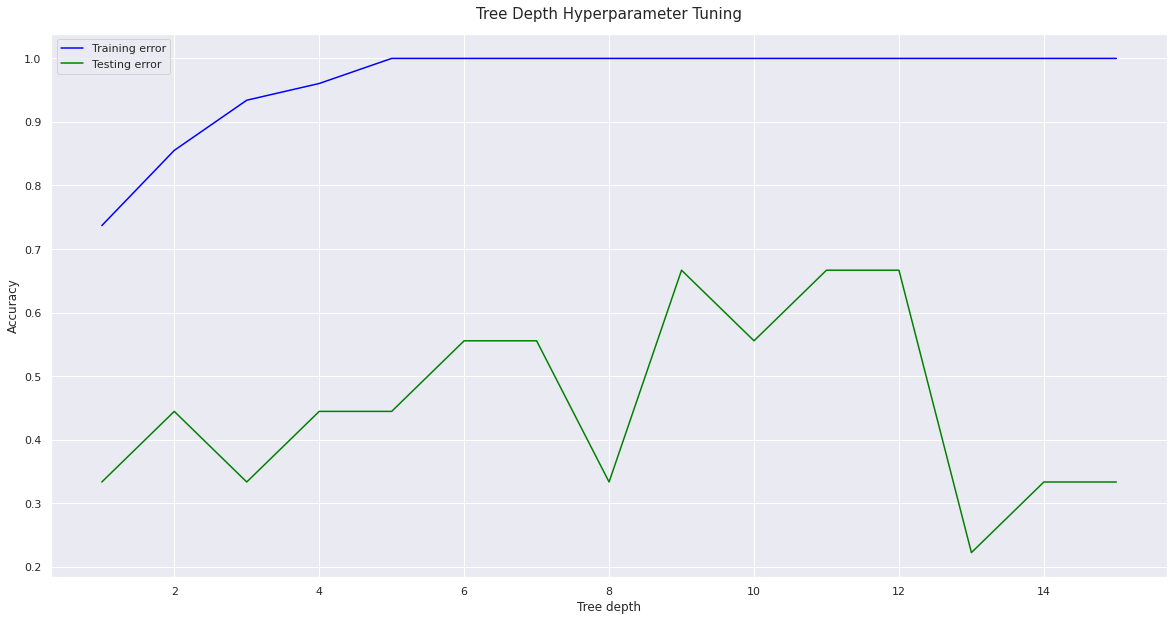

In [320]:
# Make a plot of training and test set error as the decision tree depth is varied.
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

**Findings**<br>
You can fine-tune the data by choosing which words to include. The provided
code chooses rare words, and unfortunately, as coded, it chooses hapax
legomena - words that only appear once in the corpus. Try this, and you should
see you are getting poor classification accuracy. What does the plot you get by
varying depth look like in this case? Write code to vary the depth of a decision
tree trained on the text dataset, as before, but this time only using the rare words
in the dataset.

**Rerun with words that have frequencies less than 2**

In [321]:
# With a simple code, you can see the frequency of the words
text_frequecies = X.sum()
text_frequecies.sort_values()
display(text_frequecies)

# Save words with frequecy of less than 2
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, 
# telling us if it appears twice or more in the dataset. 
# it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. 
# This simple indexing can really help to chop through
# a huge pandas dataframe.
print('\n'*2, kept_words)
small_vocab_X = X[kept_words.index]

# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

000            2
10             2
11             2
13             1
136            1
              ..
yourselves     1
zaleucus       1
zeal          26
zealand        1
zealous        8
Length: 8560, dtype: int64



 13            1
136           1
13th          1
1648          1
1683          1
             ..
yes           1
yokes         1
yourselves    1
zaleucus      1
zealand       1
Length: 2975, dtype: int64


In [322]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset large_vocab_X
# Plot the above graph again

#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 16 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train[kept_words.index], y_train)
    training_error.append(accuracy_score(y_train, model_1.predict(X_train[kept_words.index]))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train[kept_words.index], y_train)
    testing_error.append(accuracy_score(y_test, model_2.predict(X_test[kept_words.index]))) # Save Error Rate = 1-Accuracy


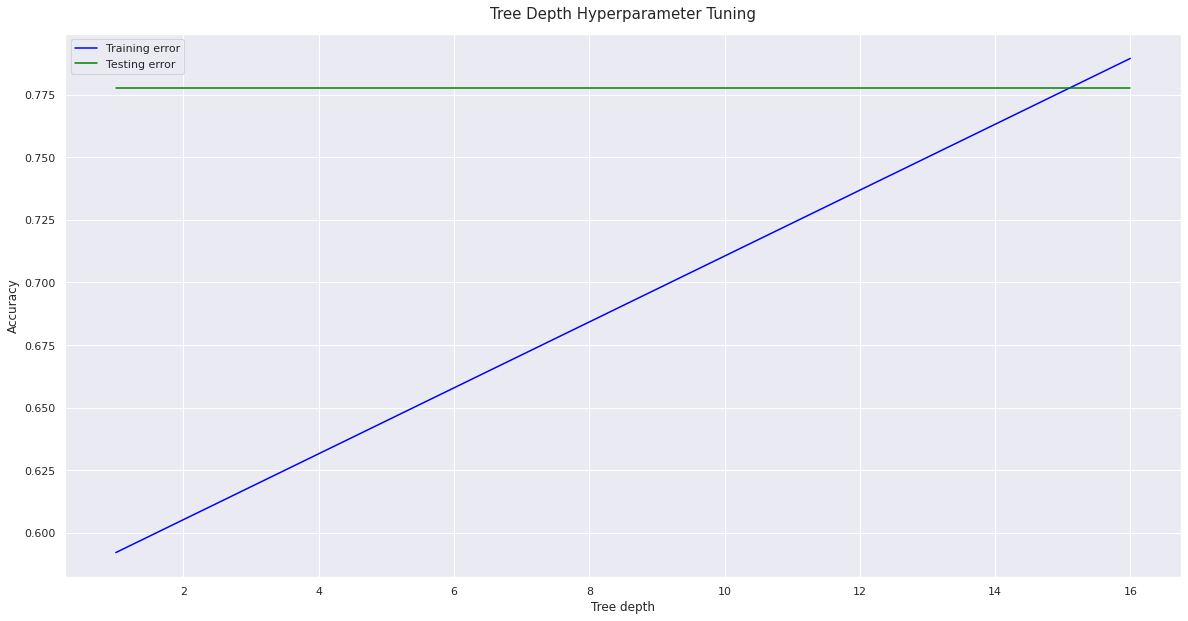

In [324]:
# Make a plot of training and test set error as the decision tree depth is varied.
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training Accuracy')
plt.plot(max_depths, testing_error, color='green', label='Testing Accuracy')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

**Findings - Explain your understanding from the graph**<br>
The graph above is ploting accuracy by tree depth when our model is based upon infrequently used words. We can see the model dosn't seem to have any impact on our ability to predict, which is why a tree depth of this range in values is not very impactful. The poor performance could be due to tree depth or feature selection. 

**Rerun with words that have frequencies greater than 100**

In [325]:
# Get words that appear frequently
text_frequecies = X.sum()
kept_words = text_frequecies[text_frequecies>100]
print('\n'*2, kept_words)



 against    331
all        731
america    115
among      129
another    155
          ... 
whole      139
within     118
without    207
yet        121
york       150
Length: 150, dtype: int64


In [326]:
from sklearn.metrics import accuracy_score

max_depths = range(1, 16 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train[kept_words.index], y_train)
    training_error.append(accuracy_score(y_train, model_1.predict(X_train[kept_words.index]))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train[kept_words.index], y_train)
    testing_error.append(accuracy_score(y_test, model_2.predict(X_test[kept_words.index]))) # Save Error Rate = 1-Accuracy


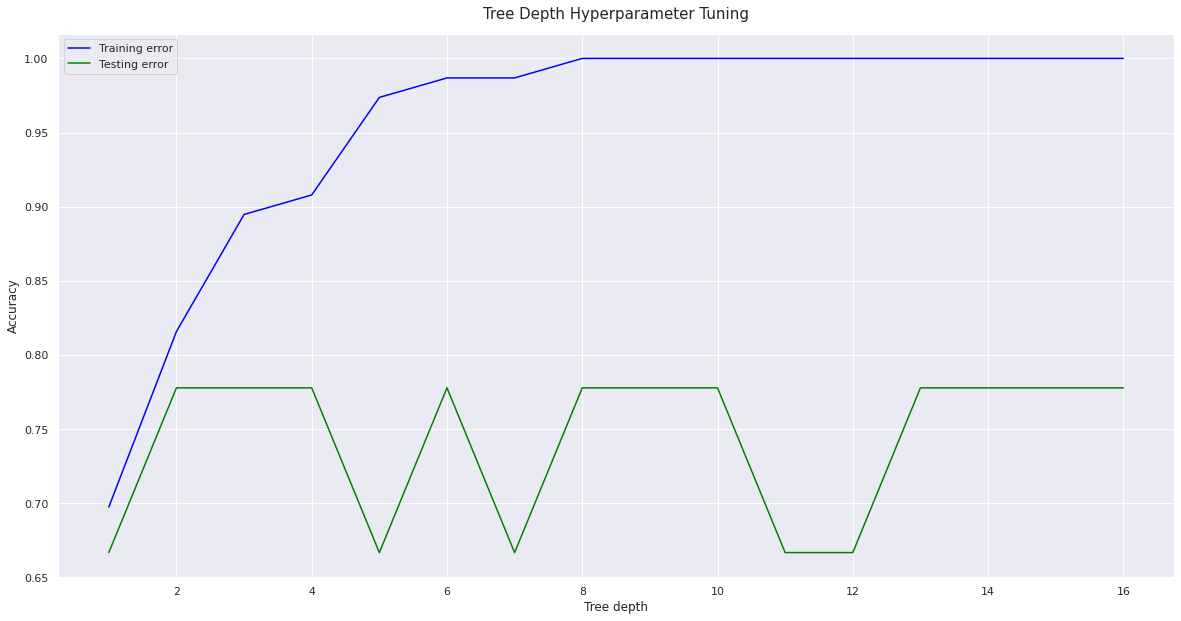

In [327]:
# Make a plot of training and test set error as the decision tree depth is varied.
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training Accuracy')
plt.plot(max_depths, testing_error, color='green', label='Testing Accuracy')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

**Findings - Explain your understanding from the graph**<br>
The graph above is ploting accuracy by tree depth when our model is based upon frequently used words. We can see the model dosn't seem to improve much with a depth greater than 2. 

### Problem 2.3

In [329]:
# Get data
a_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/audio_data.csv')
a_df

a_df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
filename,70Funk.wav,8oh8 Rim.wav,8oh8 Tin.wav
label_text,snare,snare,snare
label,0,0,0
0.00 hz,0.117469,0.003148,0.006759
...,...,...,...
10680.47 hz,0.000041,0.000036,0.000024
10766.60 hz,0.000003,0.000006,0.000003
10852.73 hz,0.000001,0.000001,0.000001
10938.87 hz,0.0,0.0,0.0


In [330]:
a_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,212.0,1.055000e+02,6.134330e+01,0.000000e+00,5.275000e+01,1.055000e+02,1.582500e+02,2.110000e+02
label,212.0,4.481132e-01,4.984775e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
0.00 hz,212.0,3.624958e+00,6.942545e+00,1.526861e-03,6.484030e-02,4.884105e-01,4.309501e+00,6.658286e+01
86.13 hz,212.0,1.741696e+01,2.643852e+01,9.484890e-04,2.177118e-01,3.617768e+00,2.433454e+01,1.900677e+02
172.27 hz,212.0,8.596787e+00,9.235777e+00,3.451092e-03,2.332045e+00,6.081414e+00,1.131237e+01,5.620369e+01
...,...,...,...,...,...,...,...,...
10680.47 hz,212.0,1.519868e-05,3.001521e-05,8.123556e-10,1.042592e-07,3.744049e-06,1.851275e-05,2.575438e-04
10766.60 hz,212.0,3.533626e-06,6.106023e-06,3.550325e-10,1.984290e-08,9.070992e-07,4.349353e-06,4.113468e-05
10852.73 hz,212.0,6.712768e-07,1.313119e-06,8.939242e-11,3.470632e-09,1.677709e-07,7.235192e-07,9.834714e-06
10938.87 hz,212.0,9.091606e-08,1.898266e-07,8.800568e-12,4.616096e-10,1.739184e-08,9.673274e-08,1.392894e-06


In [357]:
# Create the decision tree here Randomstate=42 80% training and 20% testing
X = a_df.drop(['Unnamed: 0','filename','label_text','label'], axis=1)
le = preprocessing.LabelEncoder()
labels = a_df['label_text']
le.fit(labels)
y=le.transform(labels)

# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [358]:
#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 15 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(accuracy_score(y_train, model_1.predict(X_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(accuracy_score(y_test, model_2.predict(X_test))) # Save Error Rate = 1-Accuracy


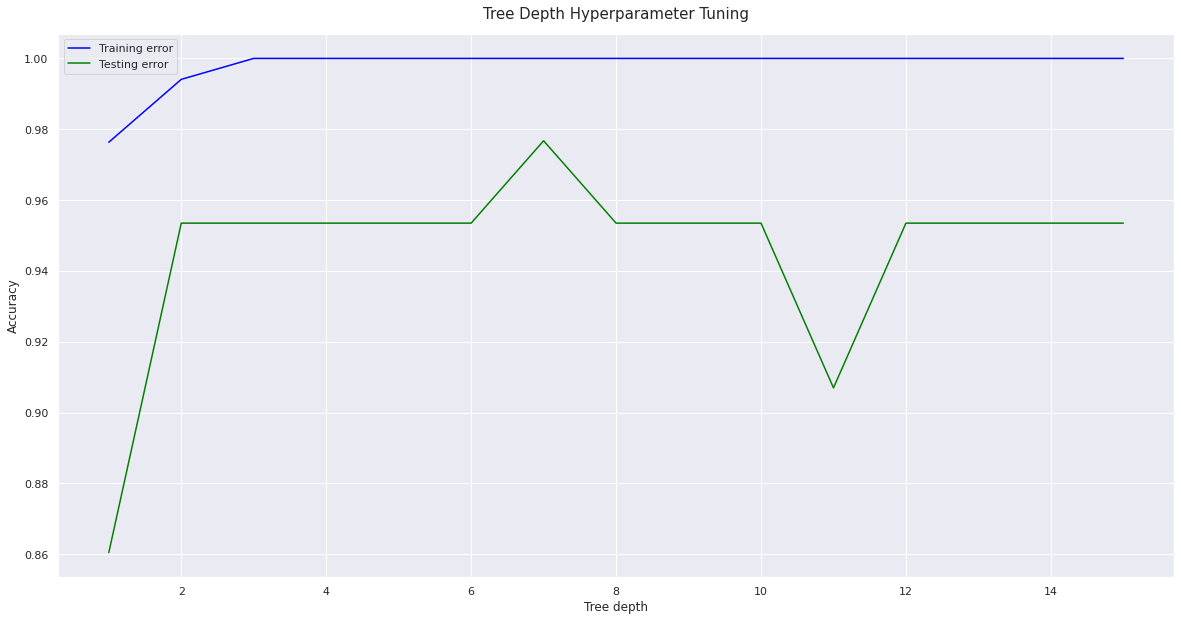

In [360]:
# Make a plot of training and test set error as the decision tree depth is varied.

plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training Accuracy')
plt.plot(max_depths, testing_error, color='green', label='Testing Accuracy')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

Set the depth of the tree to 5. Plot the tree (again, you can re-use the code from
earlier).


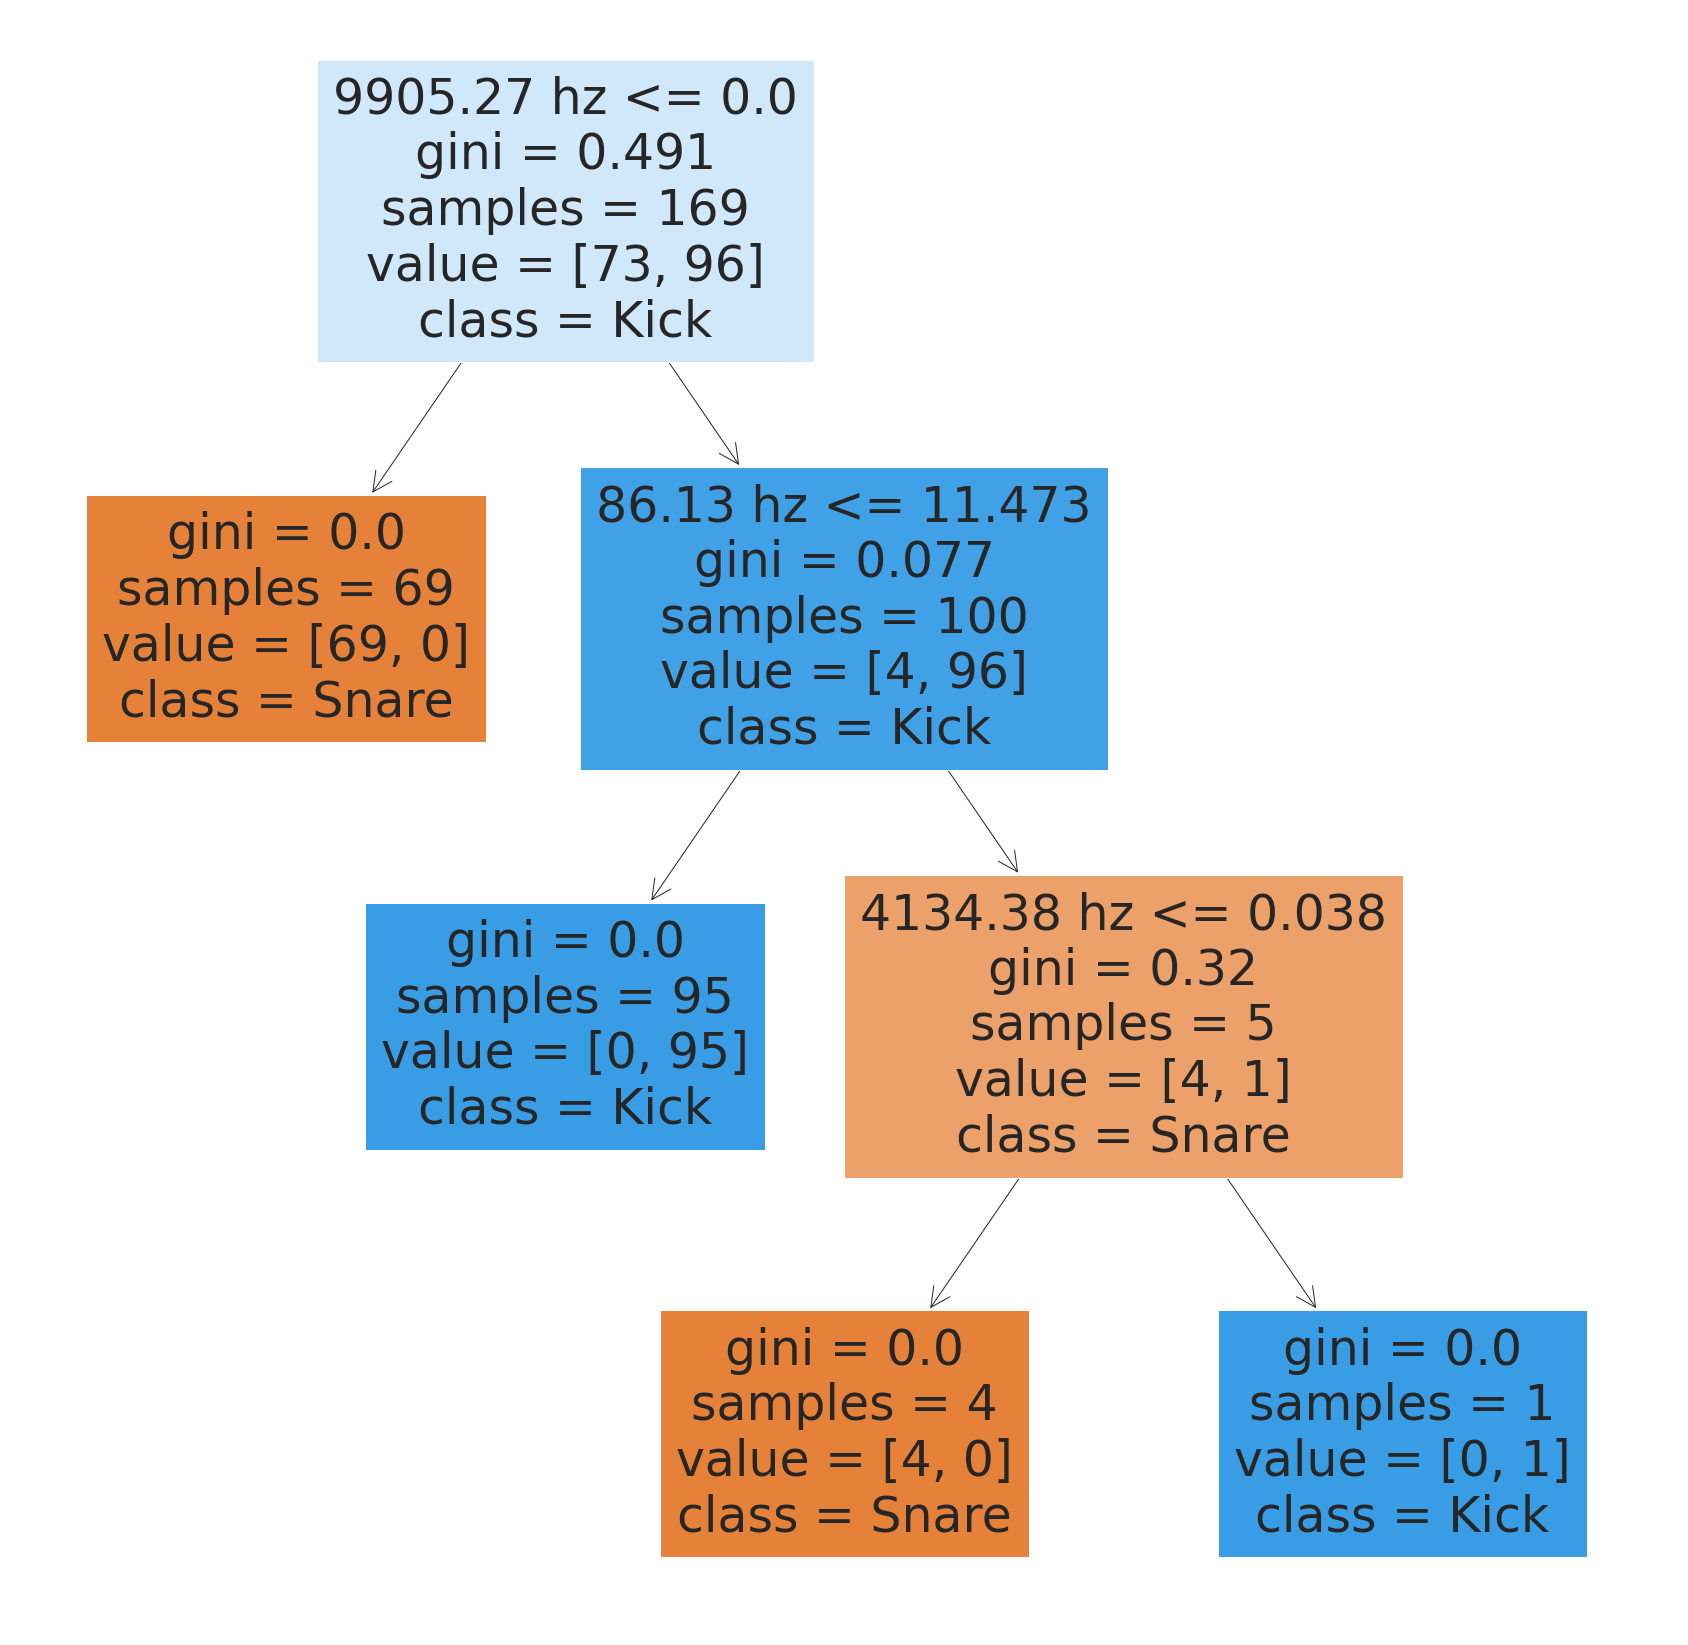

In [382]:
# Model with max depth of 5
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

# Plot the decision tree
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(dtc, 
                          filled=True, 
                          max_depth=None,
                          feature_names=X_train.columns,
                          class_names = ['Snare', 'Kick'],
                          ax=ax)

#### Dropping a training example from data

Delete one training example from the audio training set.


In [383]:
X_dropped = X.drop(1)
# y needs to be a series for this to work
y = pd.Series(y)
y_drop = y.drop(1)
# A better way to do this might be to drop rows from
# audio_data before you separate the columns out for X
# and y


 Re-run your decision tree algorithm. Display “before” and “after” decision trees in
your pdf submission.


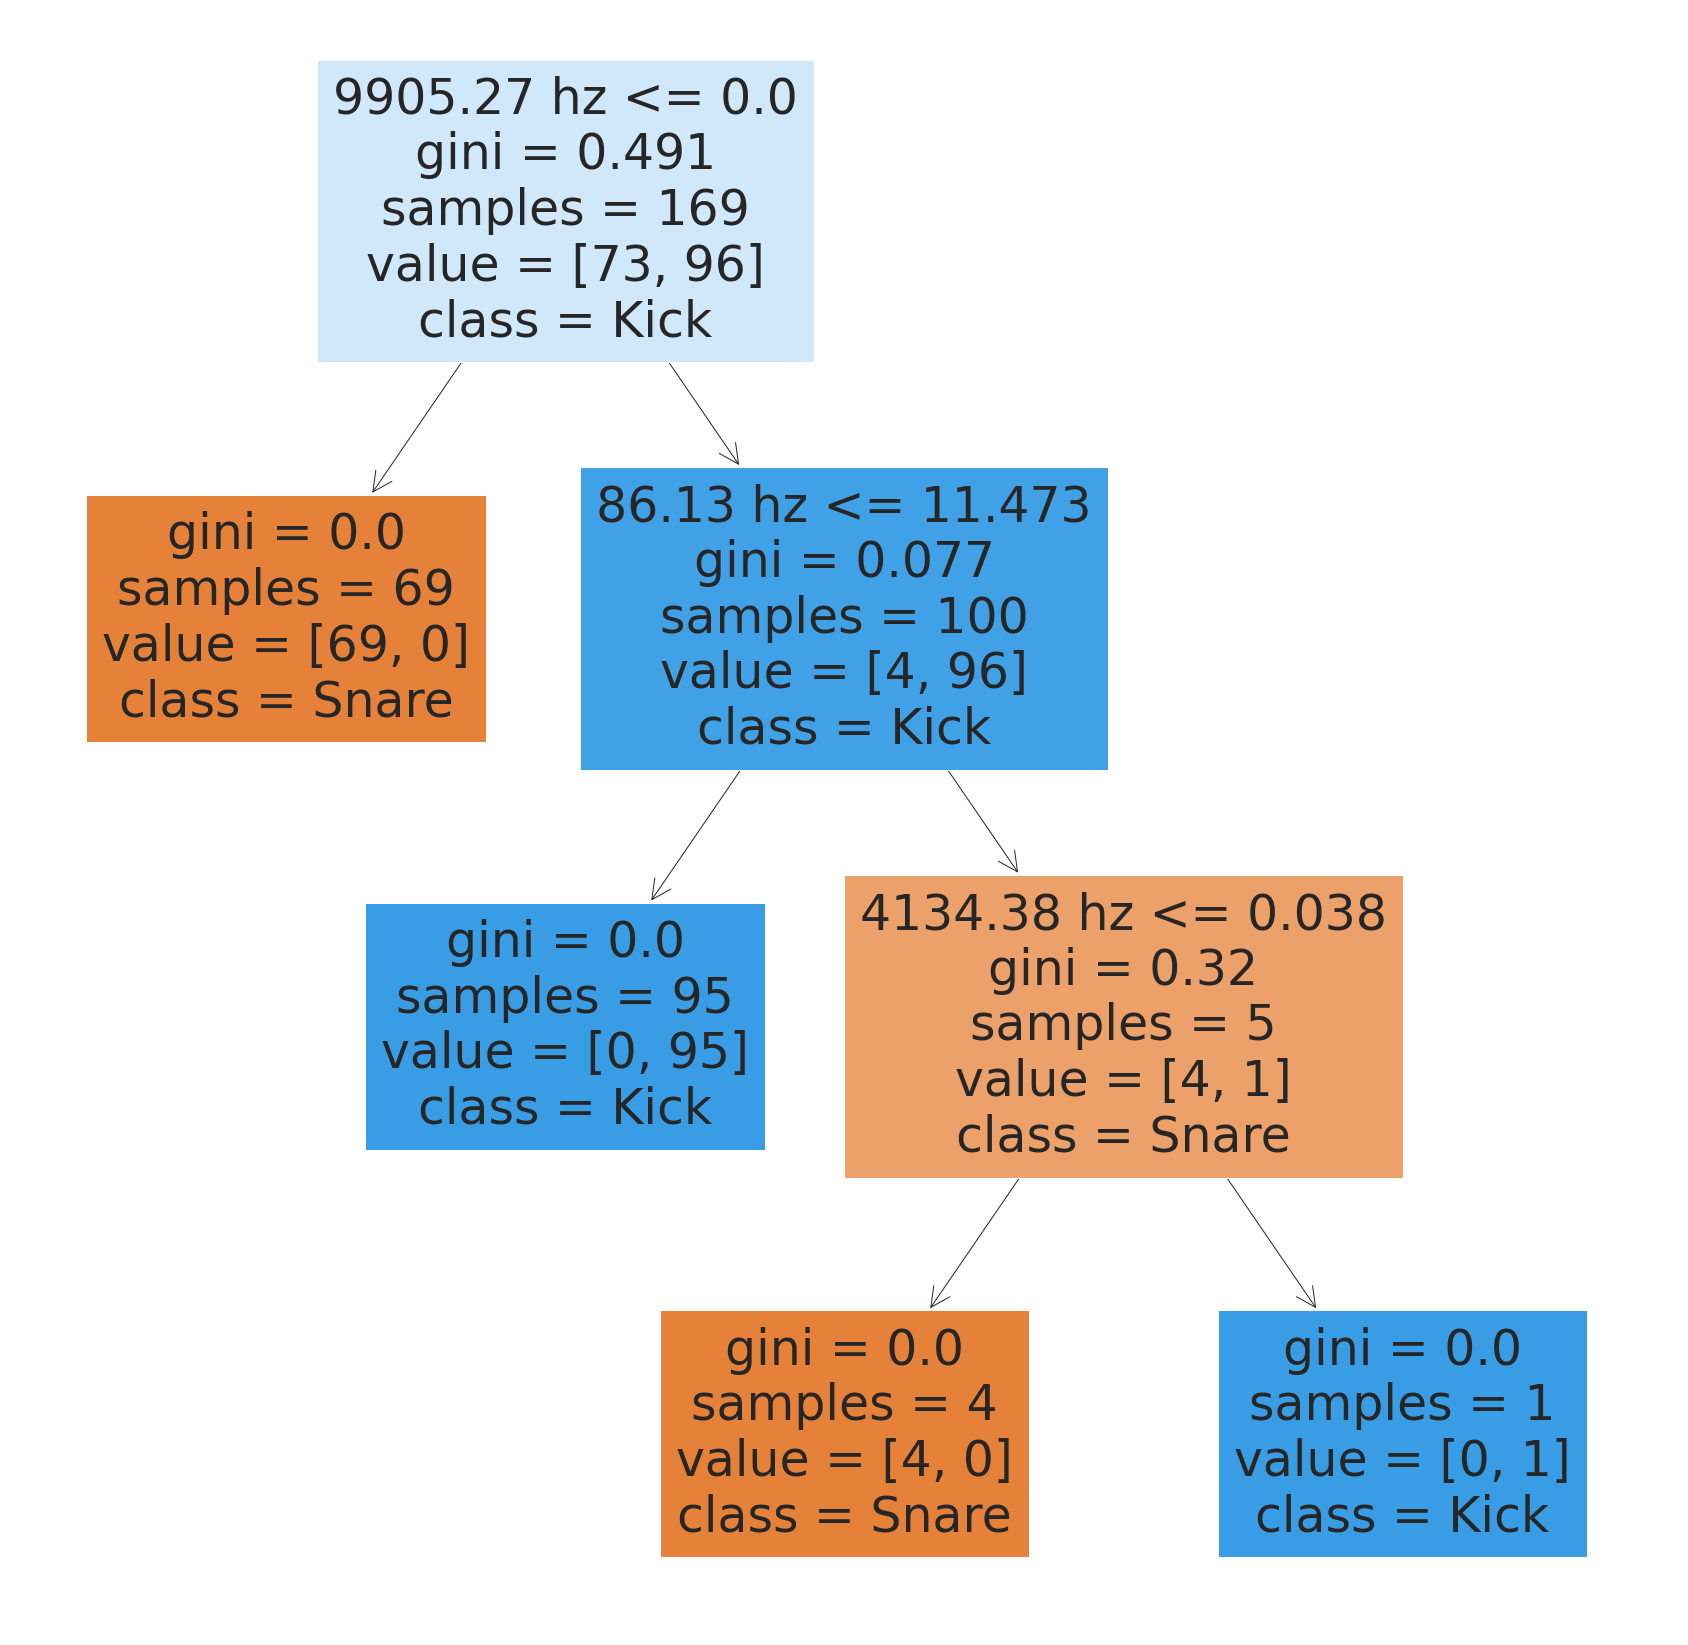

In [384]:
# Model with max depth of 5
dtc_after = DecisionTreeClassifier(max_depth=5).fit(X_dropped, y_drop)

# Plot the decision tree
fig,ax = plt.subplots(figsize = (30,30))
treeplot_after = tree.plot_tree(dtc, 
                          filled=True, 
                          max_depth=None,
                          feature_names=X_train.columns,
                          class_names = ['Snare', 'Kick'],
                          ax=ax)

Plot Before and After with row removal.

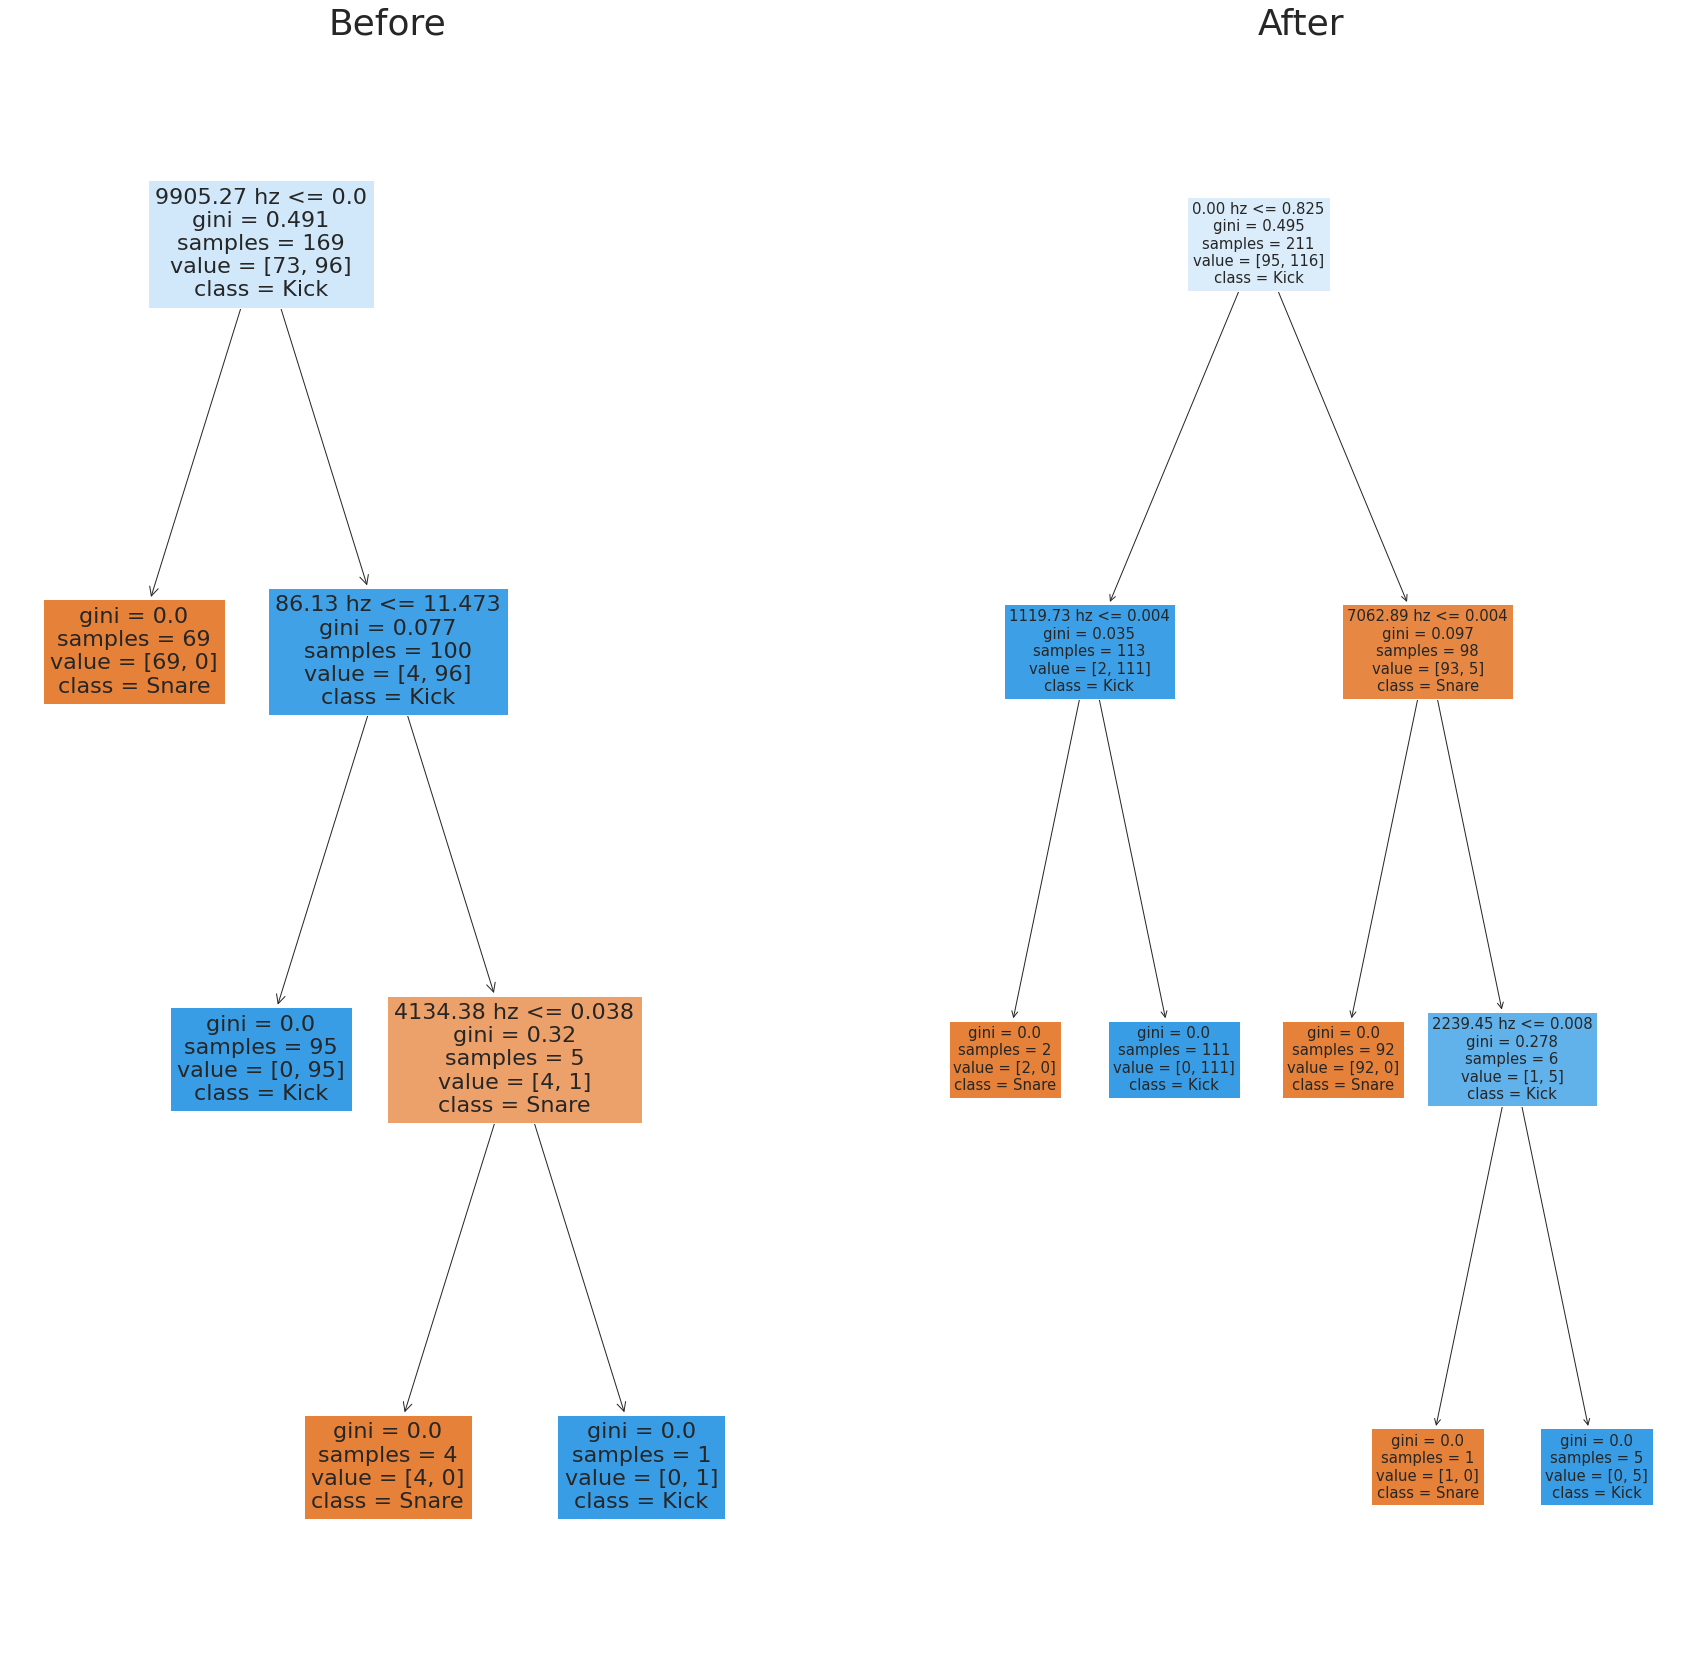

In [390]:
fig,ax = plt.subplots(figsize = (30,30))
plt.subplot(1, 2, 1)
fontsize = 36
treeplot = tree.plot_tree(dtc, 
                          filled=True, 
                          max_depth=None,
                          feature_names=X_train.columns,
                          class_names = ['Snare', 'Kick'],
                          )
plt.title("Before", fontdict={'fontsize': fontsize})
plt.subplot(1, 2, 2)
treeplot_after = tree.plot_tree(dtc_after, 
                          filled=True, 
                          max_depth=None,
                          feature_names=X_train.columns,
                          class_names = ['Snare', 'Kick'],
                          )
plt.title("After", fontdict={'fontsize': fontsize})
plt.show()

## Question 3 - Cross-Validation:
In this section, you will look more into cross-validation and model selection. These skills
will be useful as you develop more complex models.



### Problem 3.1 - 3.3

In [342]:
# Get data
a_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/audio_data.csv')

# Create the decision tree here Randomstate=42 90% training and 10% testing
X = a_df.drop(['Unnamed: 0','filename','label_text','label'], axis=1)
le = preprocessing.LabelEncoder()
labels = a_df['label_text']
le.fit(labels)
y=le.transform(labels)

# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)


In [343]:
#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 15 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(accuracy_score(y_train, model_1.predict(X_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(accuracy_score(y_test, model_2.predict(X_test))) # Save Error Rate = 1-Accuracy


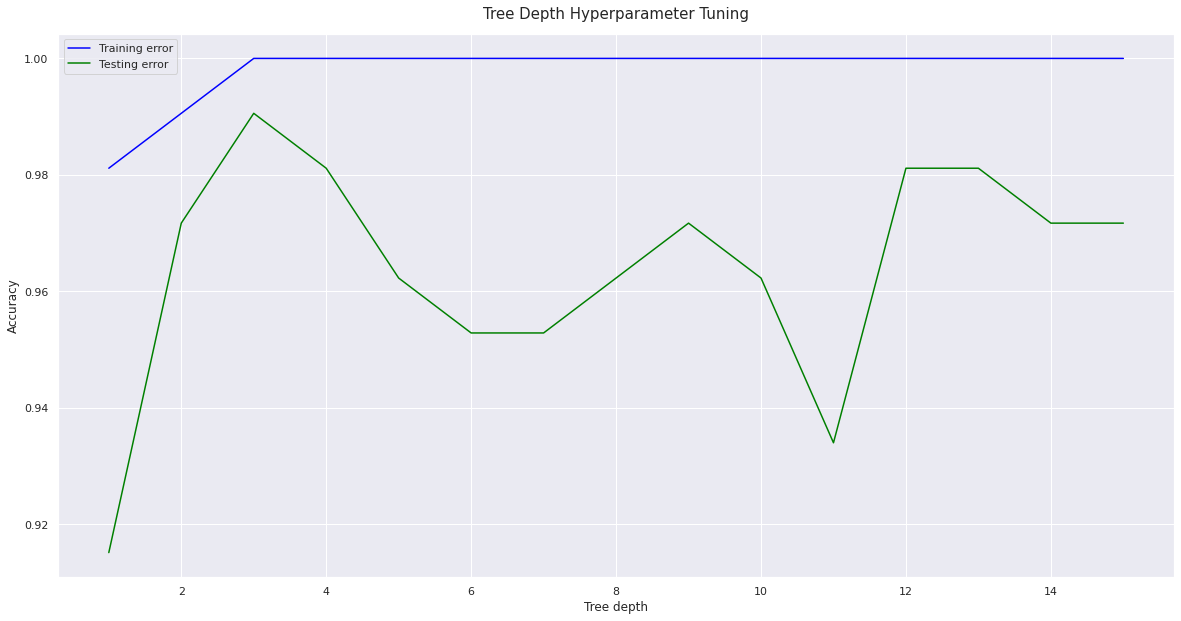

In [344]:
# Make a plot of training and test set error as the decision tree depth is varied.

plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

#### Bad Classifiers

In [345]:
class BadClassifier():
  def __init__(self):
    pd = __import__('pandas')
    self.label_counts = pd.Series()
  def train(self, y_train):
    train_labels = pd.Series(y_train)
    label_counts = train_labels.value_counts(normalize=True)
    self.label_counts = label_counts.sort_index()
  def make_random_predictions(self, X_test):
    pred_labels=[]
    test_labels = pd.Series(y_test)
    test_label_counts = np.random.multinomial(X_test.shape[0],self.label_counts.values)
    for count,label in zip (test_label_counts,self.label_counts.index.values):
      pred_labels = pred_labels + [label for x in range(0,count)]
    np.random.shuffle(pred_labels)
    return pred_labels


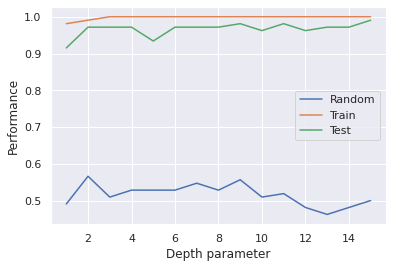

In [346]:
bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()
for x in range(1,15+1):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))   # Fill this
  model = DecisionTreeClassifier(max_depth=x).fit(X_train, y_train)
  train_errors.append(accuracy_score(y_train, model.predict(X_train)))# Fill this
  test_errors.append(accuracy_score(y_test, model.predict(X_test)))# Fill this
# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.show()

**Findings:**<br>
The above plot has three lines, showing train accuracy, test accuracy, and random predictions. It appears that our decision tree model for our audio dataset outperforms random guessing alone.


### Problem 3.5

In [347]:
# Repeat, using a smaller amount of test data
# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


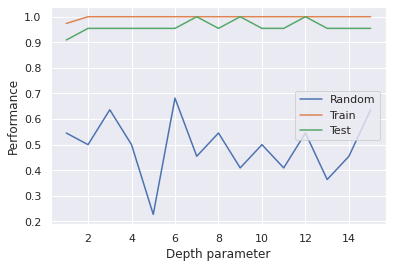

In [348]:
# Plot accuracy vs. depth again, 
# using the smaller amount of training data.

bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()
for x in range(1,15+1):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))   # Fill this
  model = DecisionTreeClassifier(max_depth=x).fit(X_train, y_train)
  train_errors.append(accuracy_score(y_train, model.predict(X_train)))# Fill this
  test_errors.append(accuracy_score(y_test, model.predict(X_test)))# Fill this
# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.show()

**Findings:**<br>
The above plot has three lines, showing train accuracy, test accuracy, and random predictions. It appears even with a smaller test set, our decision tree model for our audio dataset still outperforms random guessing alone.